In [7]:
import numpy as np
import cPickle as cp 
import urllib
from py_bing_search import*
from IPython.display import Image,display
import random
import re
from IPython.display import YouTubeVideo

In [8]:
"""Loading the trained model from pickle file"""
class mod():
	def __init__(self,user_para,features,pred):
		self.user_para = user_para
		self.features = features 
		self.pred = pred  

with open('./data/model.pkl','rb') as f:
	prediction = cp.load(f)
f.close()


In [13]:
ratings = prediction.pred
features = prediction.features
user_para = prediction.user_para

g = open('./data/movie_ids.txt','r')
movie_list = g.readlines() # 0 indexed

movie_id = int(input('Enter movie no ')) # Input movie id

Enter movie no 1


In [14]:
def pearson_sim(a,b):
    sim = np.corrcoef(a,b)
    return sim[0][1]

def cosine_sim(a,b):
    j = (a*b).sum()
    return j/ (np.sqrt((a**2).sum()) * np.sqrt((b**2).sum()) )  

"""Two different types of correllation metrics. We use only pearson."""

'Two different types of correllation metrics. We use only pearson.'

In [15]:
def rec_by_feature(features,movie_id):
	f = features[:,movie_id - 1] #0 indexed
	similarity = np.zeros(len(features[0])) 
	sim2 = np.zeros(len(features[0]))

	for i in range(len(features[0])):
		similarity[i] = similarity[i] + cosine_sim(f,features[:,i]) # Calculate cosine sim of a feature i, with respect to the features of the input movie
		sim2[i] = sim2[i] + pearson_sim(f,features[:,i]) #Similarly for pearson.
	return similarity,sim2 #return both cosine,pearson


In [16]:
def get_media(search_term,movie_key):
    bing_image = PyBingImageSearch('YOUR BING API-KEY HERE',search_term + ' movie') # Adding movie usually gives only posters
    bing_vid = PyBingVideoSearch('YOUR BING API-KEY HERE',search_term + ' trailer')
    
    first_vid = bing_vid.search(limit=10,format='json')
    first10 = bing_image.search(limit = 10,format = 'json')    
    a = first10[0]
    b = first_vid[0]
    
    pat = r'.gif' # Cannot output gif. Take care of that.    
    #filename = str(movie_key)+'.jpg'
    #urllib.urlretrieve(a.media_url,filename)
    
    i = 1
    while re.search(pat,a.media_url): #if gif, keep searching for subsequent results.
        a = first10[i]
        i+=1
        
    return [a.media_url,b.media_url] #return url for image and trailer; ipython can o/p that. Else use urllib.

Your Selection is 
1 Toy Story (1995)




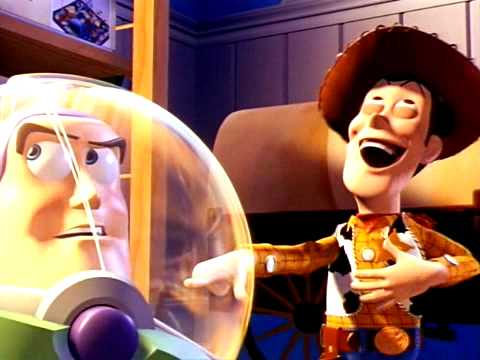

--------------------------------------------------------------------

    YOUR RECOMMENDATIONS ARE  
--------------------------------------------------------------------

********************************************************************

1 Toy Story (1995)


********************************************************************


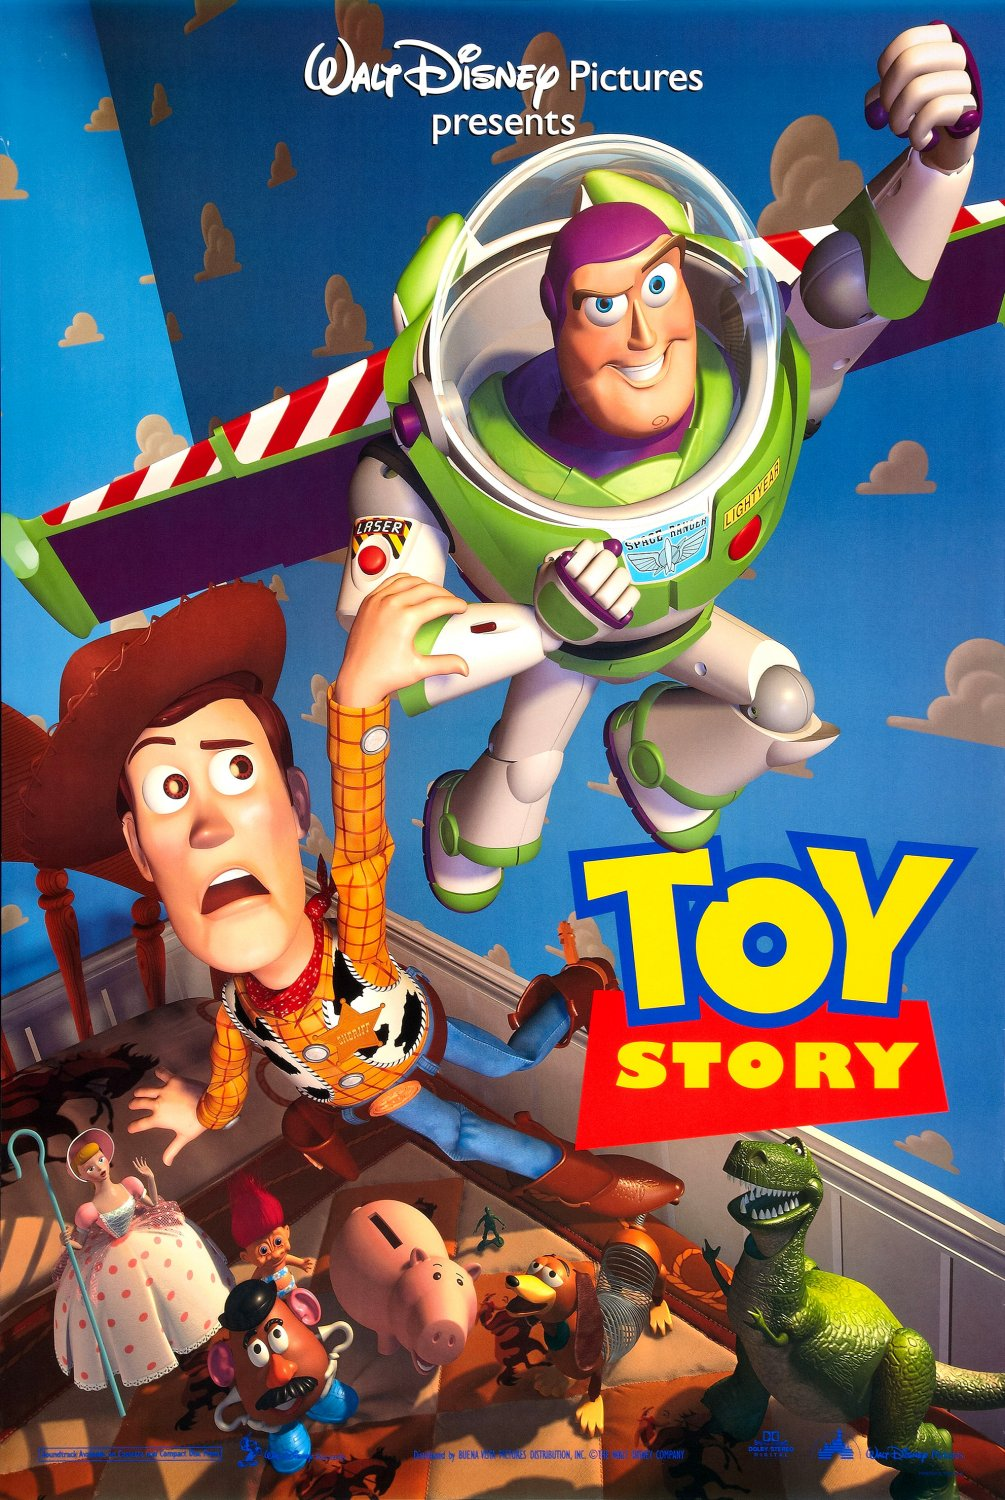




********************************************************************

95 Aladdin (1992)


********************************************************************


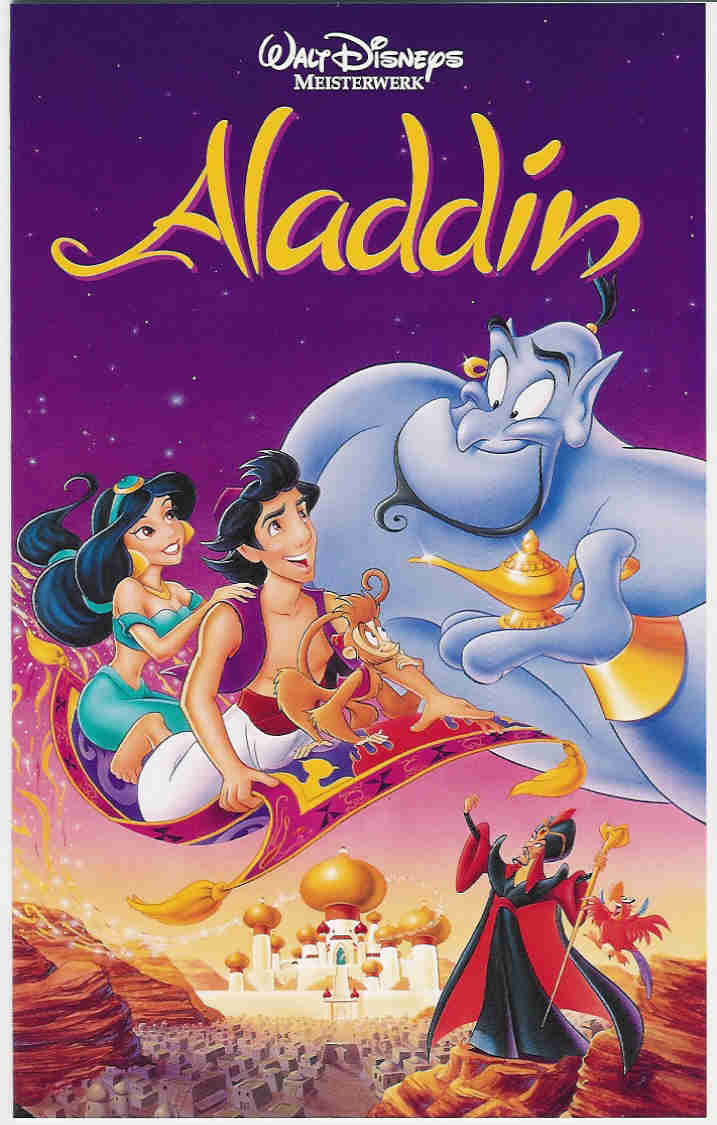




********************************************************************

204 Back to the Future (1985)


********************************************************************


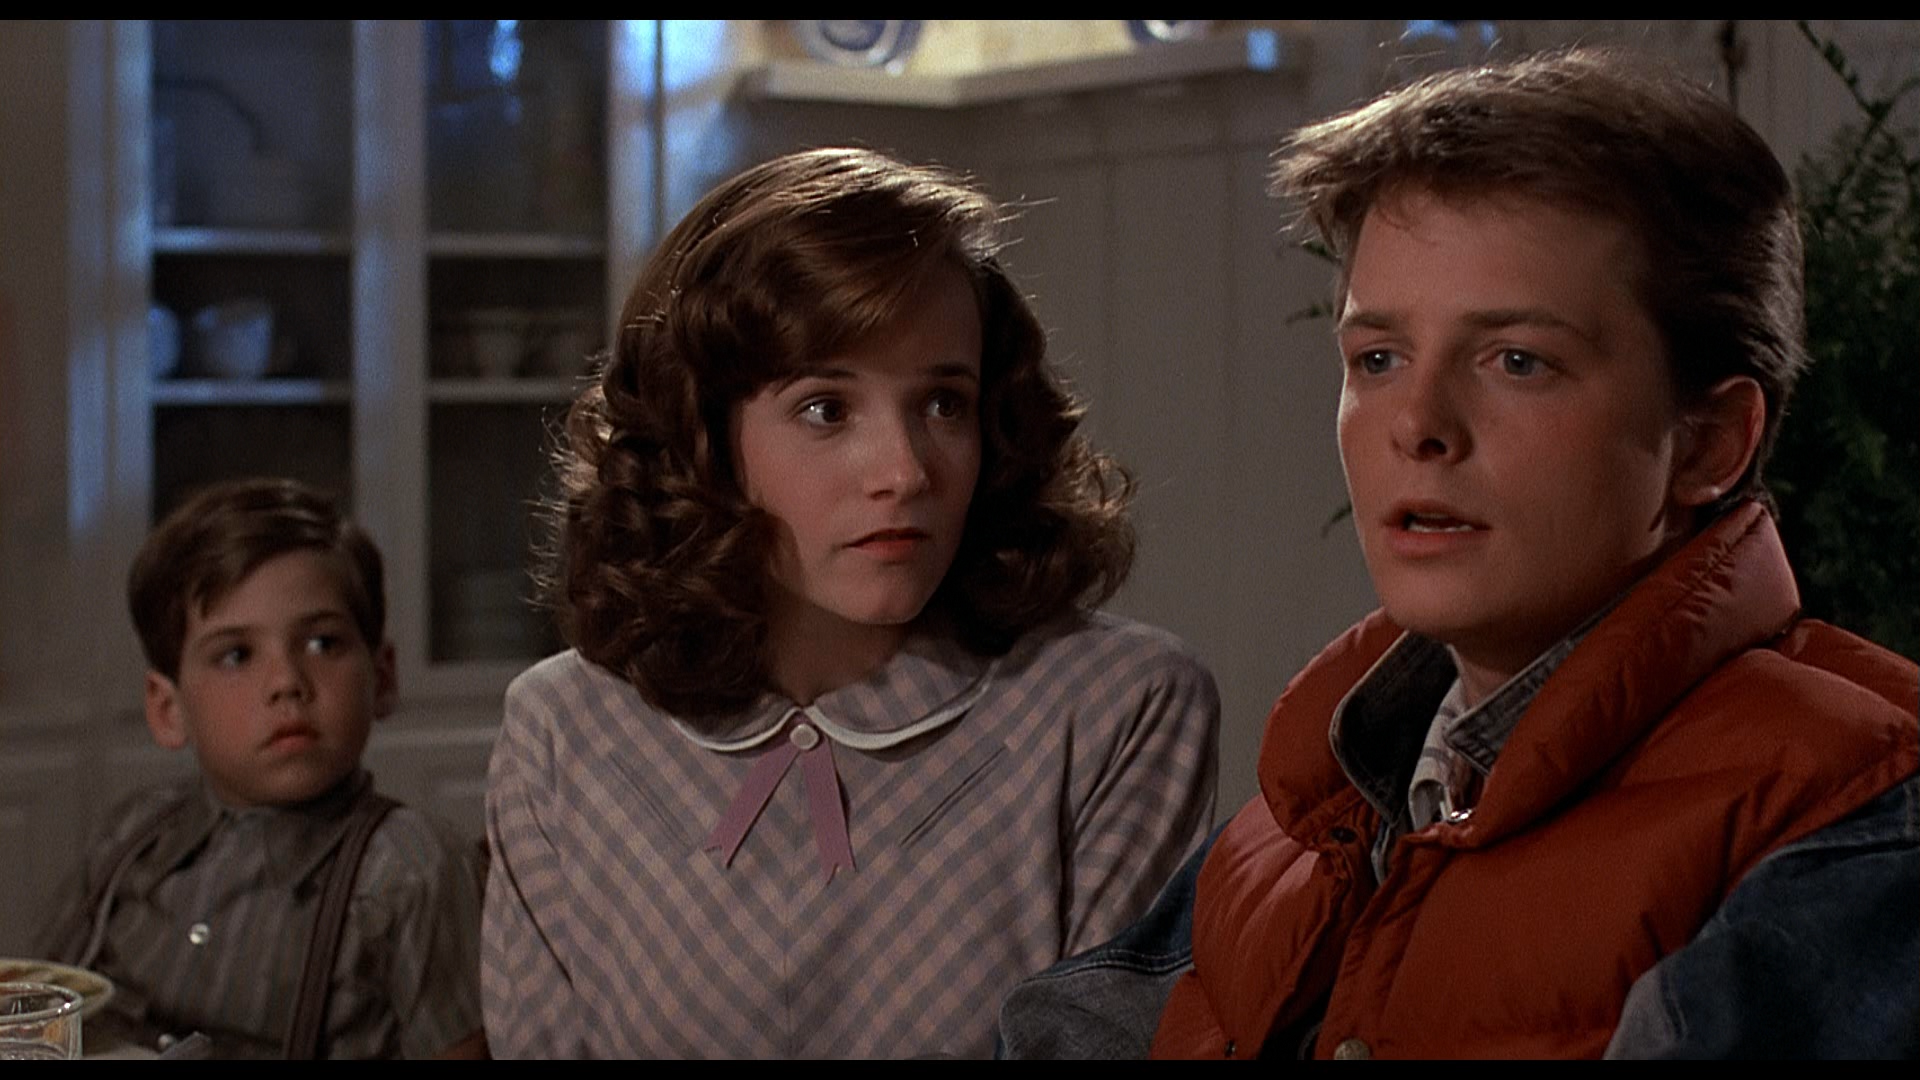




********************************************************************

174 Raiders of the Lost Ark (1981)


********************************************************************


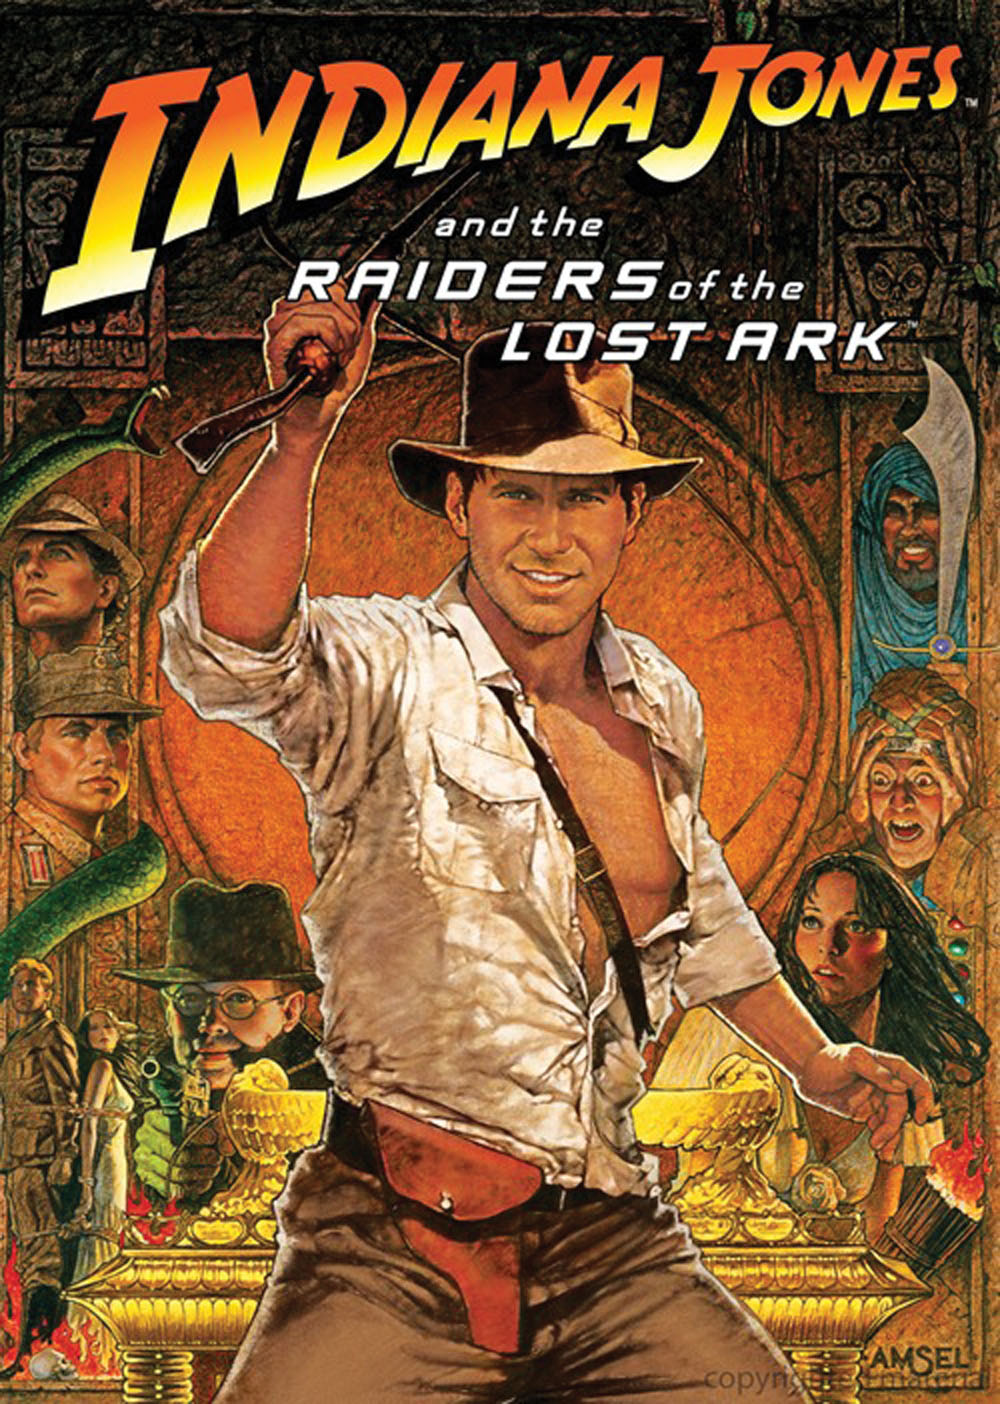




********************************************************************

210 Indiana Jones and the Last Crusade (1989)


********************************************************************


<IPython.core.display.Image object>

In [17]:
sim_cos,sim_pear = rec_by_feature(features,movie_id)
pear = []
media_list = []

for i in range(5):
    k = np.argmax(sim_pear)
    pear.append(movie_list[k])
    sim_pear[k] = 0    
    
    p = pear[i].split()
    p.pop(0)
    p.pop()
    p = ' '.join(map(str,p))
    media_list.append(get_media(p,k))

k = media_list[0][1]      # Play trailer of selected movie for fun!
print "Your Selection is "
print movie_list[movie_id - 1]
print

display(YouTubeVideo(k[k.find('=')+1::]))  #https://www.youtube.com/watch?v=YwUNC9KAfe0'; we need only after '='    

print '-'*68 + '\n'
print '    YOUR RECOMMENDATIONS ARE  '
print '-'*68 + '\n'

for i in range(len(media_list)):
    print '*'*68
    print '\n' + pear[i] + '\n'
    print '*'*68
    try:
        display(Image(media_list[i][0]))
    except:
        print"Sorry can't display image :( "
    print '\n'+'\n'